## PCA - Principal Component Analysis

`DIMENSIONALITY  REDUCTION`

We only keep the important features. we preform dimensionality reduction. ( that is 3d to 2d or 1 d. However maximum number of important feature/information is retained the new axis) Its a Unsupervised method.

In [238]:
# The number of i/p features or variables or columns present in the dataset is known as dimension.

# PCA is a way of converting the higher dimesnion data into a lower dimension data by ensuring that it provides similar
# or maximum information

`Feature Selection` --- selecting important features depending on how they help us in predicting the target or Outcome col 

`Feature Extraction` -- a method of creating new features by combining existing features.

- PCA is a feature extraction method

### Basic Steps to preform for PCA 

- 1. Standardization
- 2. Compute covariance matrix
- 3. Eigen values and Eigen vectors
- 4. Principal components 

`Note` SVD and Dimensionality reduction are different things for PCA

In [239]:
# steps involved in PCA:

# 1) Standardize the datapoints: brings all the data to a same scale.

# 2) Compute the covariance matrix:
#     i) Variance: it is the spread of the data from the mean or the average point.
#     ii) Covariance matrix: it calculates the measure of how two variables vary each other.

# 3) Compute the eigen values and the eigen vectors
#     i) Eigen value ------ magnitude
#     ii) Eigen vectgor -------- directional_link

# 4) sort the eigen values -------- if the eigen values is high, information spread is high

# 5) select the no of pc's ------- scree plot

# 6) interpret the new data

In [240]:
# lets start

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") # to ignore the warings we may get due to version issues or not updated packages


In [241]:
from sklearn import datasets

In [242]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'data',
 'descr',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_cir

In [243]:
from sklearn.datasets import load_digits

In [244]:
digit = load_digits()

# digit has numbers from 0-9 and they are handwritten (stored as pixels)
# clear image ---> more data is captured, blur image ---> less data is captured ( less pixel)

# we don't have to download data as its present in sklearn itself (so we just imported it)

# As digit is handwritten we load digit images hence its in pixel format.( pixel is data here)

# Here pixels are the numbers stored in an array. we will use these number apply PCA and 
# reduce the pixels of that particular digit

In [245]:
digit 

# here the data array is the pixel
# images are separated by comma in 2 d array [data].

# this is a 8x8 image. Hence the pixel count is 64. Therefore we have 64 cols (or 0-63 cols)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [246]:
digit.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

- array([[ 0.,  0.,  5., ...,  0.,  0.,  0.], --> img 1
       [ 0.,  0.,  0., ..., 10.,  0.,  0.], --> img 2
       [ 0.,  0.,  0., ..., 16.,  9.,  0.], --> img 3 
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [247]:
digit.target

array([0, 1, 2, ..., 8, 9, 8])

Target: array([0, 1, 2, ..., 8, 9, 8]) tells us that the first image is 0, 
    second is one and so on. { its not arranged in any order just depends on the target col to see which number it is}

#### As its a gray scale range of image  is 0-255 (256 range)

In [248]:
digit.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

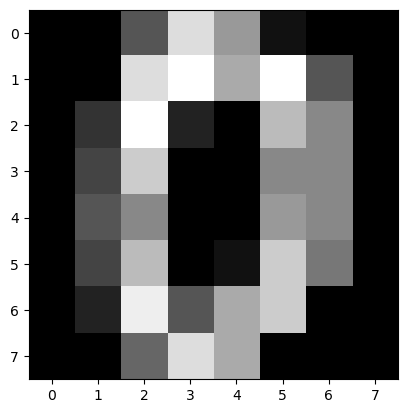

In [249]:
plt.imshow(digit.images[0], cmap=plt.cm.gray)

# 0 - black and 255 - near white
# here as its gray scale the data can only be from 0 to 255
# the numbers in the above array of images[0] is shade of gray for numbers between 1-254

In [250]:
# just to see the white ness of the cell only for learning
#d = digit.images[0]
#d[0][1] = 200
#d
#plt.imshow(d,cmap=plt.cm.gray )

In [251]:
digit.images[15]

array([[ 0.,  5., 12., 13., 16., 16.,  2.,  0.],
       [ 0., 11., 16., 15.,  8.,  4.,  0.,  0.],
       [ 0.,  8., 14., 11.,  1.,  0.,  0.,  0.],
       [ 0.,  8., 16., 16., 14.,  0.,  0.,  0.],
       [ 0.,  1.,  6.,  6., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 16.,  3.,  0.,  0.],
       [ 0.,  1.,  5., 15., 13.,  0.,  0.,  0.],
       [ 0.,  4., 15., 16.,  2.,  0.,  0.,  0.]])

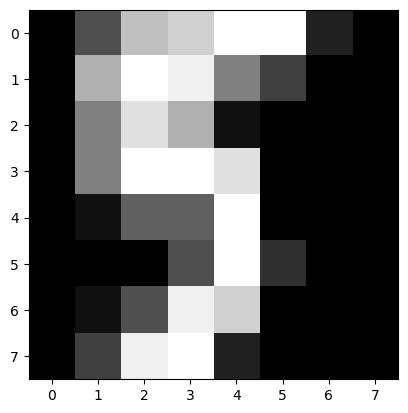

In [252]:
plt.imshow(digit.images[15], cmap=plt.cm.gray)

# imshow -- Display data as an image, i.e., on a 2D regular raster

In [253]:
digit.images[16]

array([[ 0.,  0.,  0.,  8., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 12., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16., 13.,  5.,  0.],
       [ 0.,  0., 15., 16.,  9.,  9., 14.,  0.],
       [ 0.,  0.,  3., 14.,  9.,  2., 16.,  2.],
       [ 0.,  0.,  0.,  7., 15., 16., 11.,  0.]])

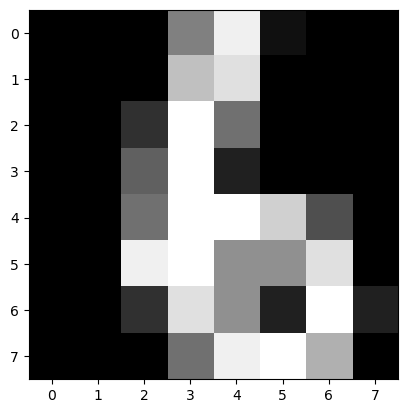

In [254]:
plt.imshow(digit.images[16], cmap=plt.cm.gray)

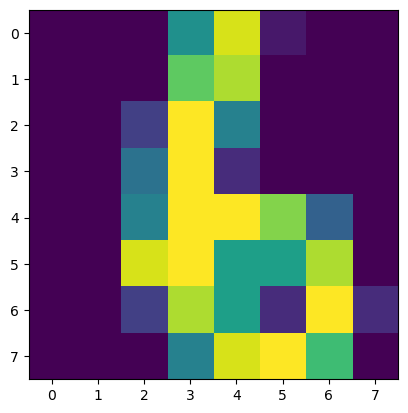

In [255]:
plt.imshow(digit.images[16])
#  matplotlib has some default colors
# so, if colours are not mentioned then default colors gets displayed automatically


In [256]:
x= pd.DataFrame(digit.data)

In [257]:
x

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


- 1797 -- rows or images
- 64 -- is the pixel of those images

In [258]:
y = pd.DataFrame(digit.target)

In [259]:
y

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


### Standardization

In [260]:
from sklearn.preprocessing import StandardScaler

In [261]:
x_std=StandardScaler().fit_transform(x)

In [262]:
x_std

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [263]:
x_std.shape

(1797, 64)

### Transpose the data 

we are transposing the data as we will perform operation on number of pixels (cols) not on the number of images(rows)

- as we are performing operation image wise (take all the columns to reduce dimensionality) as we will be performing operations from 0-63. We use transpose


In [264]:
x1=x_std.T
x1

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.33501649, -0.33501649, -0.33501649, ..., -0.33501649,
        -0.33501649, -0.33501649],
       [-0.04308102, -1.09493684, -1.09493684, ..., -0.88456568,
        -0.67419451,  1.00877481],
       ...,
       [-1.14664746,  0.54856067,  1.56568555, ..., -0.12952258,
         0.8876023 ,  0.8876023 ],
       [-0.5056698 , -0.5056698 ,  1.6951369 , ..., -0.5056698 ,
        -0.5056698 , -0.26113572],
       [-0.19600752, -0.19600752, -0.19600752, ..., -0.19600752,
        -0.19600752, -0.19600752]])

In [265]:
x1.shape

(64, 1797)

In [266]:
#covarience mat
# varience ---> spread of data from mean
# co varience-> calculate the measure of how two variables vary from each other

# co varience vs VIF ??
cov_mat=np.cov(x1)

In [267]:
cov_mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.00055679,  0.55692803, ..., -0.02988686,
         0.02656195, -0.04391324],
       [ 0.        ,  0.55692803,  1.00055679, ..., -0.04120565,
         0.07263924,  0.08256908],
       ...,
       [ 0.        , -0.02988686, -0.04120565, ...,  1.00055679,
         0.64868875,  0.26213704],
       [ 0.        ,  0.02656195,  0.07263924, ...,  0.64868875,
         1.00055679,  0.62077355],
       [ 0.        , -0.04391324,  0.08256908, ...,  0.26213704,
         0.62077355,  1.00055679]])

In [268]:
cov_mat.shape

(64, 64)

In [269]:
# eigen value and eigen vector
# eigen value ---> magnitude ( search what is magnitude)
# eigen vector --> direction link or direction of movements
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)


In [270]:
len(eigen_values)

64

In [271]:
print(eigen_vectors)

[[ 0.          0.          0.         ...  1.          0.
   0.        ]
 [ 0.18223392 -0.04702701  0.02358821 ...  0.          0.
   0.        ]
 [ 0.285868   -0.0595648  -0.05679875 ...  0.          0.
   0.        ]
 ...
 [ 0.103198    0.24261778 -0.02227952 ...  0.          0.
   0.        ]
 [ 0.1198106   0.16508926  0.10036559 ...  0.          0.
   0.        ]
 [ 0.07149362  0.07132924  0.09244589 ...  0.          0.
   0.        ]]


In [272]:
#total

total = sum(eigen_values)
total

61.03396436525628

In [278]:
#eigen value / total eigen value *100
7.34477606/61.03396436525629 *100

12.033916093087718

In [279]:
eigen_values

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.29406627, 0.27692285, 0.05037444,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

`Explained Variance` - It is a measure/computation on to check how much variation in a particular dataset will be there.
eg : For each PCA how the eigen values are generated is called a explained variance.
    
[How much variation will be there on each eigen value that is generated by PCA]

In [274]:
var_exp = [(i/total)*100 for i in eigen_values]   #individual explained variance
var_exp

# the first value is calculated above.

# If we are taking the first eigen value how much of it [explained variables]  will I be able to retrive is explained variance

[12.033916097734906,
 9.561054403097865,
 8.444414892624566,
 6.498407907524172,
 4.860154875966402,
 4.214119869271951,
 3.942082803567385,
 3.389380924638329,
 2.9982210116252355,
 2.932002551252223,
 2.7818054635503326,
 2.577055092581992,
 2.275303315764251,
 2.227179739514345,
 2.165229431849241,
 1.9141666064421363,
 1.775547085168197,
 1.6380692742844278,
 1.5964601688623445,
 1.4891911870878207,
 1.347969565817942,
 1.2719313702347528,
 1.1658373505919528,
 1.057646598536322,
 0.9753159471981119,
 0.944558989732,
 0.8630138269707247,
 0.8366428536685132,
 0.7976932484112434,
 0.7464713709260596,
 0.7255821513702724,
 0.6919112454811803,
 0.6539085355726157,
 0.6407925738459855,
 0.5913841117223418,
 0.5711624052235242,
 0.5236368034166365,
 0.48180758644514216,
 0.4537192598584475,
 0.08253509448180221,
 0.1036957301557182,
 0.42316275323278035,
 0.4060530699790376,
 0.39708480827582837,
 0.12510074249730155,
 0.13511841133708566,
 0.1477626941060878,
 0.16123606225672743,
 0.1

In [275]:
# cumulative explained variance

cum_var_exp = np.cumsum(var_exp)

In [282]:
# here the first value will remain the same for cumulative 

# however the second variable is calculated as 1st + 2nd values of explained variables
12.033916097734906 + 9.561054403097865 #cumulative sum of 2

# then keep adding next next numbers for the next values

21.594970500832773

In [283]:
12.033916097734906 + 9.561054403097865 + 8.444414892624566 #cumulative sum of 3

30.039385393457337

In [276]:
cum_var_exp



array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  94.20102924,  94.6547485 ,  94.73728359,
        94.84097932,  95.26414208,  95.67019515,  96.06727995,
        96.1923807 ,  96.32749911,  96.4752618 ,  96.63649786,
        96.80444425,  96.98776275,  97.18327518,  97.38687281,
        97.60512967,  97.83961267,  98.19610598,  98.45528092,
        98.73177018,  99.07255736,  99.36113266,  99.68896799,
       100.        , 100.        , 100.        , 100.  

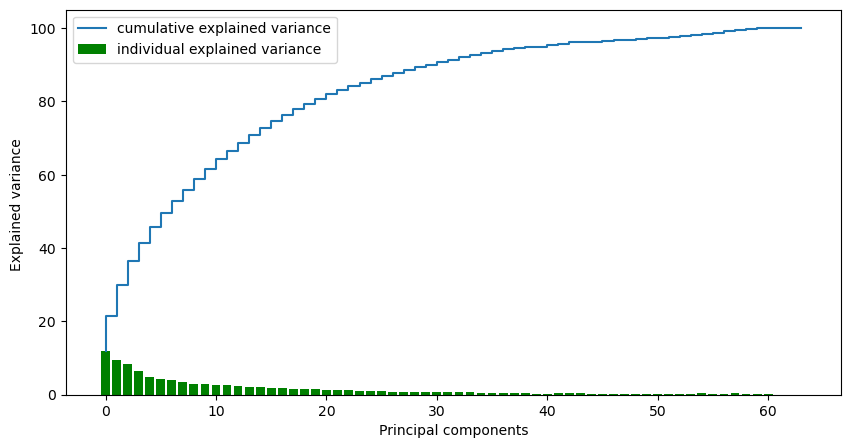

In [277]:
#scree plot
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp,label='cumulative explained variance')
plt.ylabel('Explained variance ')
plt.xlabel('Principal components')
plt.legend()
plt.show()

- From your original data how much percentage of the details are you able to retrieve you can see from the above graph.


- where on x-axis all your components (PC's are present) and on your y-axis it shows the data that we will be able to retrieve for particukar Pc's.


- We are calculating `explained variables` only if we want to draw the graph and choose components (principle components) from it.


- we are taking the value ( value is nothing but the data we will be having and with that how much individual feature can be extracted) ----> from the graph

In [ ]:
# PCA WAS USED FOR DIMENSIONALITY REDUCTION. However, we can now use 
# supervised models here as we target in the given dataset.

In [284]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_std,y,train_size = 0.8)

In [285]:
(1797/100) *80 #checking the train values 

1437.6

In [286]:
1797/100*20

359.4

In [287]:
from sklearn.decomposition import PCA

# pca = PCA(n_components=20)
pca = PCA(0.95)
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)

In [288]:
pca_x_train.shape

(1437, 40)

In [289]:
pca_x_test.shape

(360, 40)

In [290]:
from sklearn.tree import DecisionTreeClassifier

In [291]:
dt = DecisionTreeClassifier()
dt.fit(pca_x_train, y_train)

DecisionTreeClassifier()

In [292]:
predict = dt.predict(pca_x_test)
predict #

array([4, 1, 6, 3, 0, 4, 4, 7, 9, 5, 5, 3, 8, 5, 5, 3, 2, 9, 2, 8, 3, 8,
       5, 7, 9, 8, 2, 1, 1, 1, 5, 4, 4, 0, 4, 6, 1, 0, 9, 4, 2, 8, 4, 6,
       0, 1, 7, 7, 4, 6, 4, 2, 0, 0, 1, 8, 9, 9, 4, 8, 7, 1, 8, 0, 9, 4,
       6, 5, 5, 6, 3, 7, 7, 7, 8, 6, 5, 3, 6, 2, 5, 1, 2, 2, 3, 1, 2, 7,
       2, 0, 6, 9, 7, 3, 7, 4, 5, 0, 5, 5, 2, 2, 2, 7, 5, 9, 5, 6, 7, 7,
       9, 3, 0, 6, 3, 6, 3, 1, 9, 2, 0, 8, 0, 7, 0, 2, 4, 2, 1, 7, 7, 7,
       1, 7, 3, 1, 8, 6, 2, 1, 4, 3, 5, 8, 8, 5, 6, 0, 7, 4, 1, 3, 1, 9,
       9, 4, 6, 3, 6, 0, 1, 3, 9, 3, 6, 9, 5, 9, 3, 8, 4, 3, 9, 5, 5, 7,
       0, 9, 6, 9, 8, 7, 6, 6, 7, 7, 4, 0, 5, 9, 5, 2, 3, 8, 2, 4, 6, 4,
       3, 9, 0, 6, 6, 1, 8, 7, 0, 8, 6, 3, 1, 5, 4, 3, 9, 7, 0, 7, 4, 1,
       4, 2, 6, 3, 1, 1, 3, 4, 0, 7, 7, 0, 5, 6, 2, 5, 7, 3, 3, 2, 6, 7,
       3, 3, 9, 7, 4, 9, 3, 9, 1, 4, 9, 5, 3, 5, 4, 8, 0, 4, 9, 5, 9, 3,
       5, 8, 7, 4, 7, 1, 1, 6, 3, 9, 6, 8, 3, 6, 2, 7, 0, 0, 5, 2, 3, 9,
       6, 5, 2, 5, 5, 7, 5, 0, 6, 0, 0, 2, 0, 2, 5,

In [293]:
y_test

,0
1114,4
1367,1
262,6
226,3
202,0
...,...
1391,6
288,5
1692,5
554,8


In [294]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [295]:
cm = confusion_matrix(predict,y_test)

In [296]:
cm.shape

(10, 10)

In [297]:
cm

#the diagonal line is the correct predictions 

array([[32,  0,  0,  0,  0,  0,  2,  0,  0,  1],
       [ 0, 29,  0,  0,  0,  1,  0,  0,  2,  1],
       [ 0,  0, 28,  3,  0,  0,  0,  0,  1,  1],
       [ 0,  1,  4, 31,  0,  0,  0,  1,  2,  3],
       [ 0,  2,  0,  0, 32,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  1, 38,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  2,  0],
       [ 0,  0,  2,  0,  2,  0,  0, 35,  0,  0],
       [ 0,  1,  0,  1,  0,  1,  0,  0, 22,  0],
       [ 1,  0,  1,  3,  1,  3,  0,  0,  4, 21]], dtype=int64)

In [298]:
accuracy_score(y_test,predict)

0.8555555555555555